## HR ANALYSIS EMPLOYEE ATTRITION & PERFORMANCE

### GOAL 

The goal of this analysis is to develop a model that accurately identifies employees at risk of attrition. This model will enable the HR department to proactively intervene and implement retention strategies for high-risk employees, thereby reducing attrition rates and maintaining a stable and productive workforce. 

In [2]:
# importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
# loading the dataset

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## UNDERSTANDING THE DATASET

In [4]:
# printing the first 5 dataset

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# number of rows and column

df.shape

(1470, 35)

In [6]:
# columns

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# to get a concise information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# summary statistics of dataset

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# to check for NaN value in the dataset

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# to check for duplicated value in the dataset

df.duplicated().sum()

0

## DATA CLEANING 



In [11]:
df["Age"]

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64



Simplifying the dataset by working with age bins, which makes analysis and interpretation easier.

Helps focus on broader age categories rather than individual ages.


In [12]:
# to get the minimum age value

df.Age.min()

18

In [13]:
# to get the maximum age value

df.Age.max()

60

In [14]:
#creating labels and bins 

labels = ["18-26", "27-35", "36-44", "45-53", "54-61"]

bins = (18, 26, 35, 44, 53, 61)

In [15]:
# adding new column to the dataframe 

df["Age_bins"] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)

df[["Age", "Age_bins"]].head(10)



,Age,Age_bins
0,41,36-44
1,49,45-53
2,37,36-44
3,33,27-35
4,27,27-35
5,32,27-35
6,59,54-61
7,30,27-35
8,38,36-44
9,36,36-44


In [16]:
df["Education"]

0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64

1 - 5 does not pass a lot of information, thereby making it difficult for easy interpretation.  

    1 : 'Below College'
    
    2 : 'College'
    
    3 : 'Bachelor'
    
    4 : 'Master'
    
    5 : 'Doctor'


In [17]:
new_value = {1:"Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"}

df["Education"] = df["Education"].replace(new_value)

In [18]:
df["Education"]

0             College
1       Below College
2             College
3              Master
4       Below College
            ...      
1465          College
1466    Below College
1467         Bachelor
1468         Bachelor
1469         Bachelor
Name: Education, Length: 1470, dtype: object

In [19]:
df["JobInvolvement"]

0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64

1 - 4 does not pass a lot of information, thereby making it difficult for easy interpretation.  
  
       1 : 'Low'
       
       2 : 'Medium'
       
       3 : 'High'
       
       4 : 'Very High'


In [20]:
new_value = {1:"Low", 2:"Medium", 3:"High", 4:"Very High"}

df["JobInvolvement"] = df["JobInvolvement"].replace(new_value)

In [21]:
df["JobInvolvement"]

0            High
1          Medium
2          Medium
3            High
4            High
          ...    
1465    Very High
1466       Medium
1467    Very High
1468       Medium
1469    Very High
Name: JobInvolvement, Length: 1470, dtype: object

In [4]:
# dropping unnecessary columns 

clean_df = df.drop(["Age", "EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis = 1)



In [23]:
## FINAL DF

clean_df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bins
0,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,36-44
1,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,45-53
2,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,36-44
3,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,27-35
4,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,27-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,884,Research & Development,23,College,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,36-44
1466,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,36-44
1467,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,27-35
1468,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,45-53


## EXPLORATORY DATA ANALYSIS 

1. Distribution of the target variable (Attrition)

In [24]:
# to get the value counts of Attrition

Attrition = clean_df["Attrition"].value_counts()

Attrition

Attrition
No     1233
Yes     237
Name: count, dtype: int64

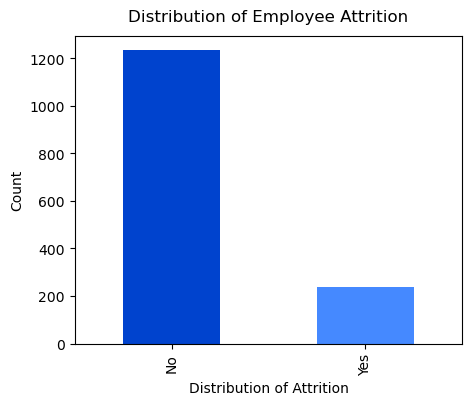

In [25]:
# plotting the bar chart
Attrition.plot(kind = "bar", figsize = (5, 4), color = ("#0043ce", "#4589ff"))

# labeling the chart
plt.xlabel ("Distribution of Attrition")
plt.ylabel ("Count")
plt.title ("Distribution of Employee Attrition", y = 1.02)

# to show
plt.show()

In [26]:
# to get the percentage distribution

Attrition_percentage = clean_df["Attrition"].value_counts() / len (clean_df) * 100

Attrition_percentage 

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64

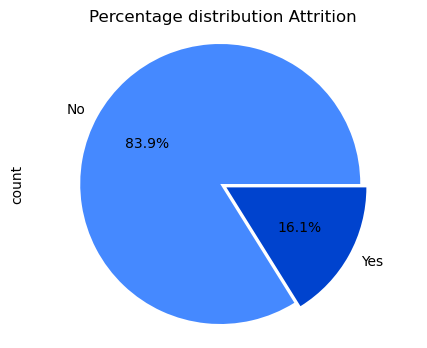

In [27]:
color = ("#4589ff", "#0043ce")
explode = (0, 0.05)

# plotting the bar chart
Attrition_percentage.plot(kind = "pie", figsize = (5, 4), autopct="%1.1f%%", explode = explode, colors = color)
plt.title ("Percentage distribution Attrition")
plt.axis ("equal")

# to show the chart
plt.show()

## INSIGHTS

 Attrition Rate
 
    - No     1233

    - Yes     237



- From this analysis, we could draw that the company attrition rate of approximately 16% indicates moderate turnover, which could impact productivity, morale and organizational stability. 

- Attrition rate of 16% may indicate underlying issues within the company related to employee satisfaction, retention strategies, organizational culture, leadership, career development opportunities, compensation, or work-life balance. 

- Addressing these underlying factors contributiong to attribution is essential to improve employee retention and foster a more stable and productive workforce

In [28]:
# Temporary fix for deprecated alias

np.float = float
np.int = int
np.object = object


## UNIVARIANT ANALYSIS

- Univariate analysis focuses on exploring individual variables in isolation, providing insights into their distributions and characteristics. 

- Performing univariate analysis for each variable will provide valuable insights into the distribution and characteristics of individual features in your dataset. 

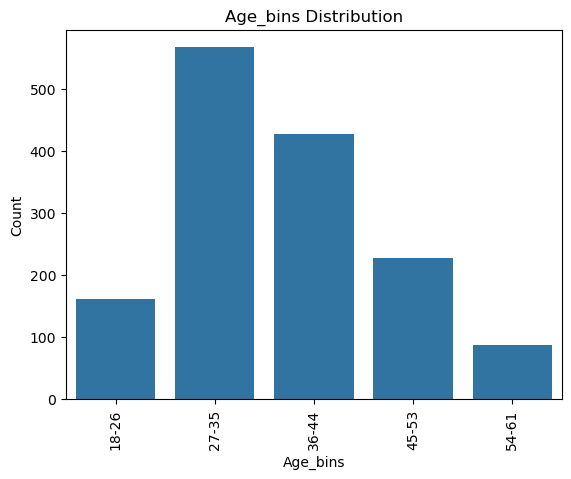

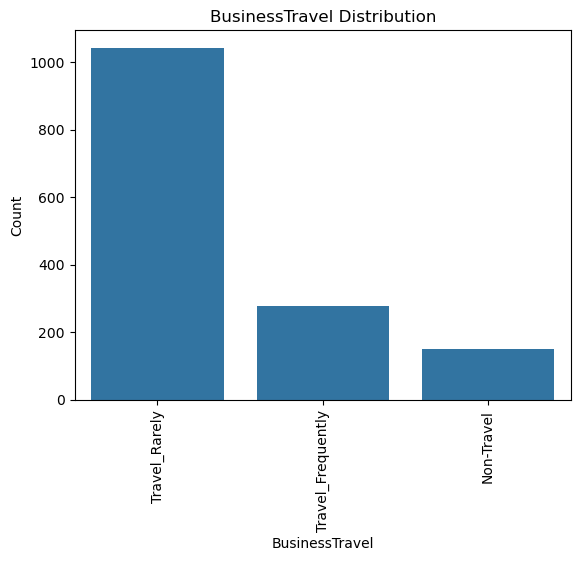

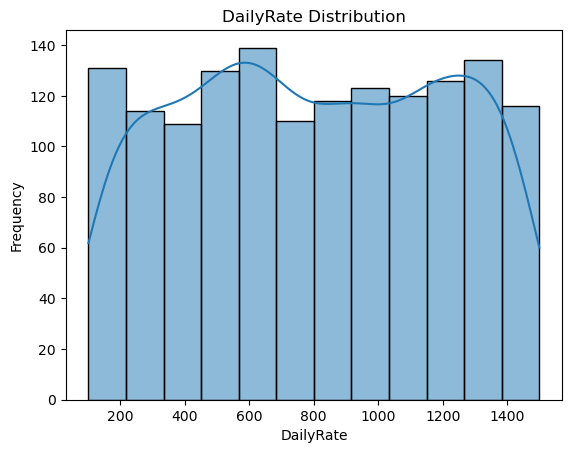

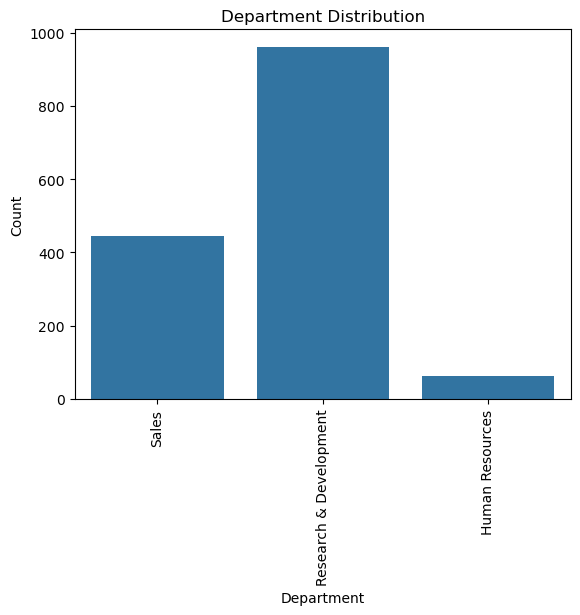

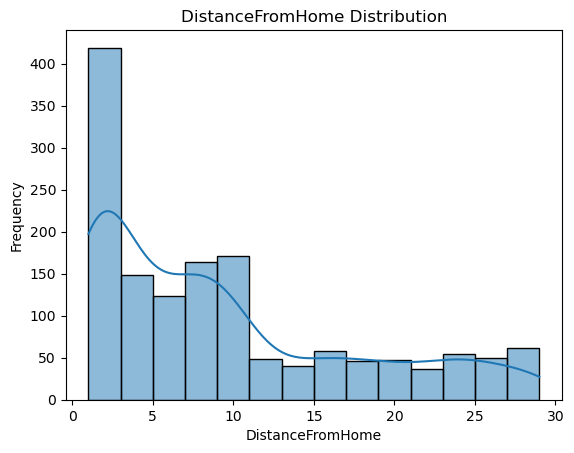

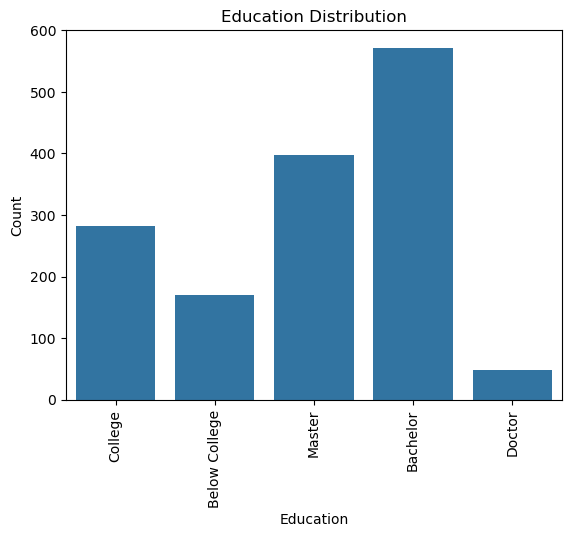

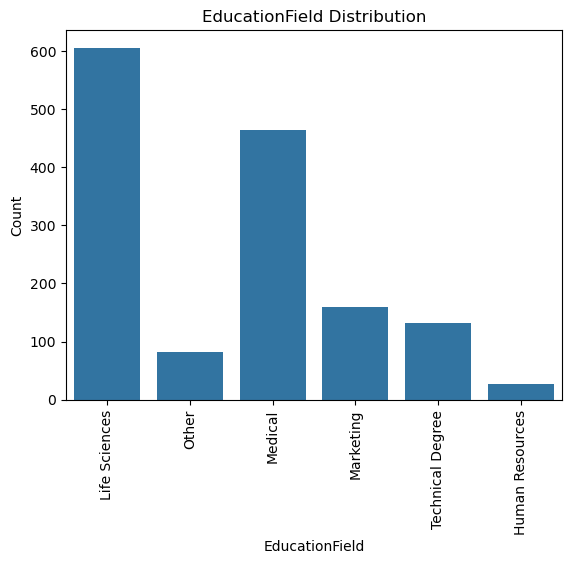

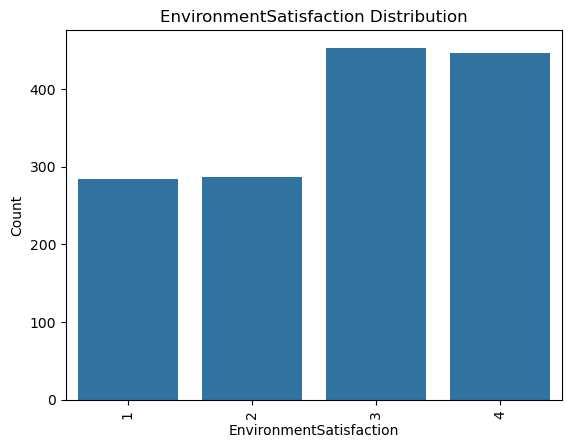

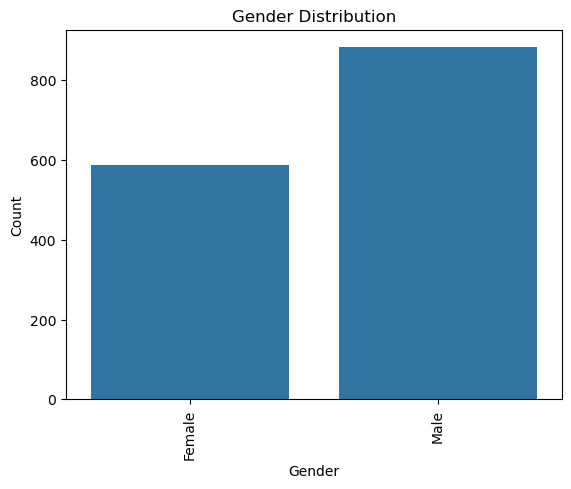

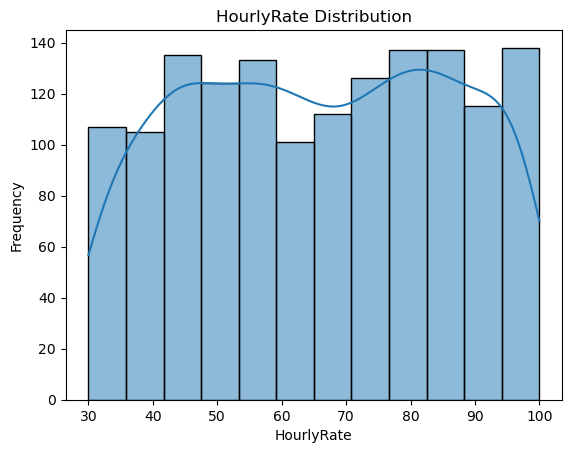

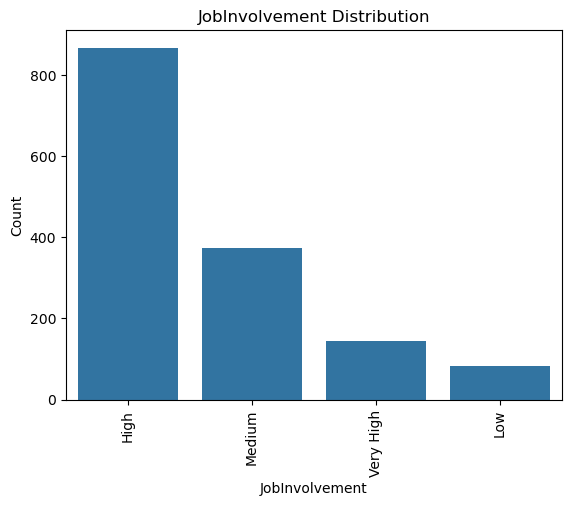

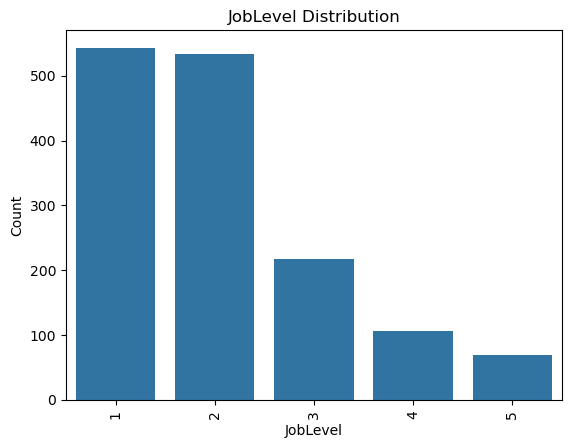

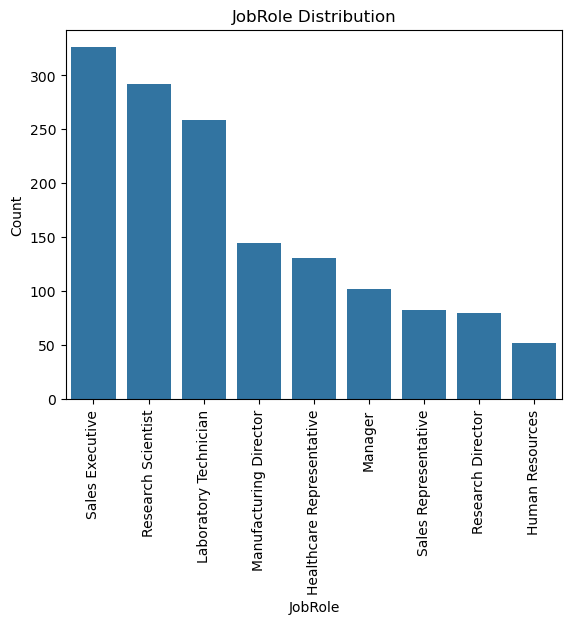

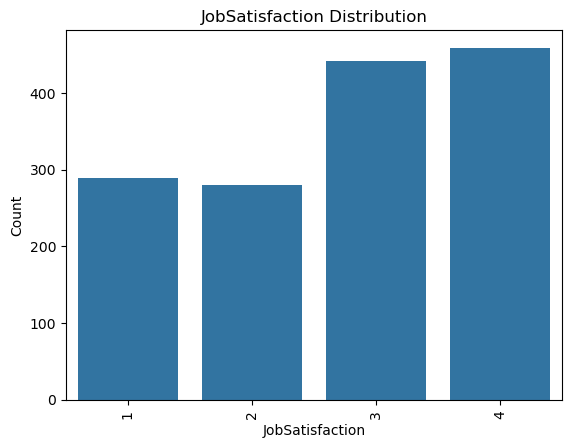

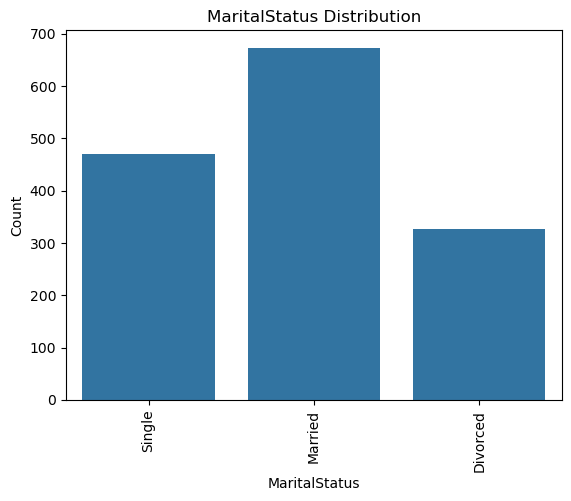

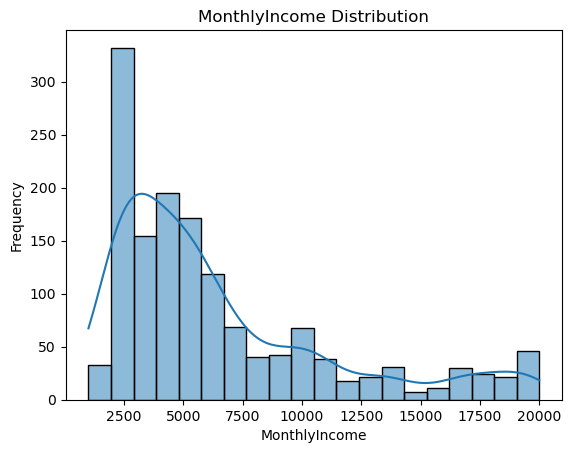

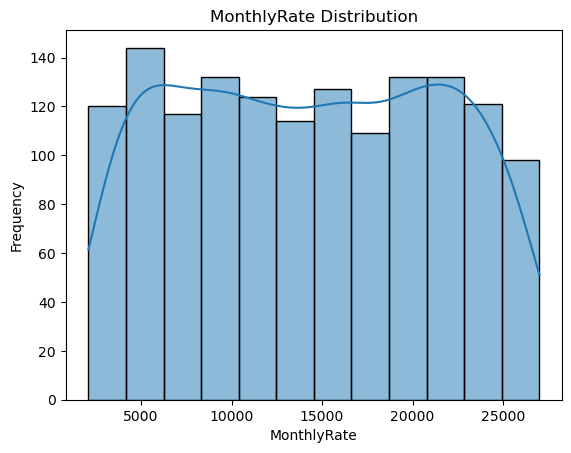

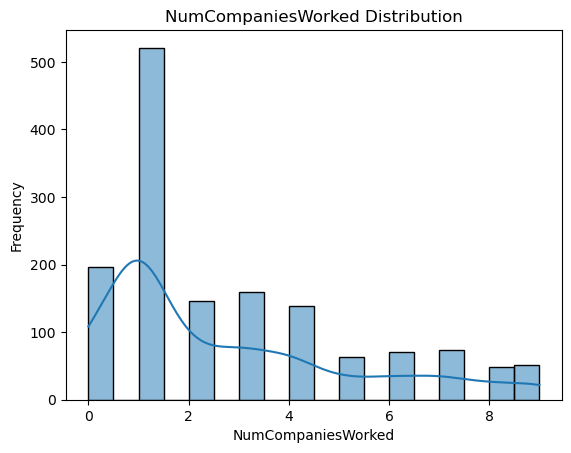

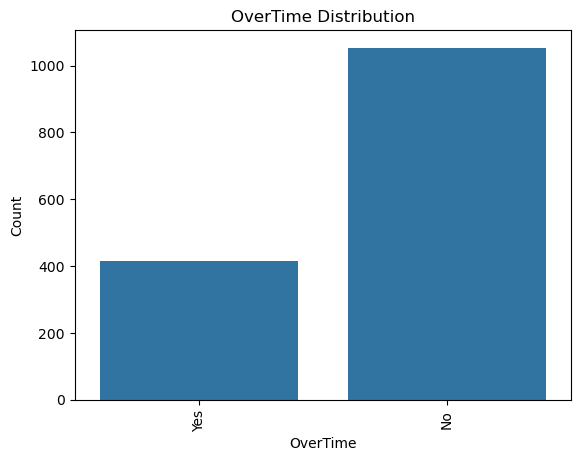

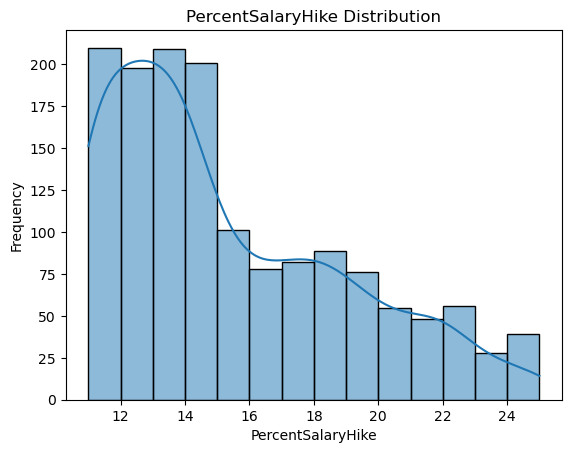

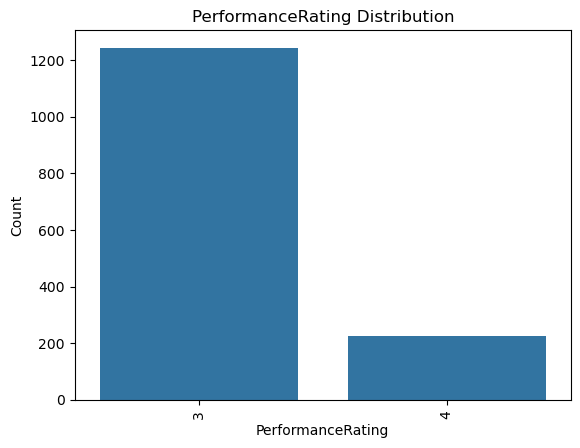

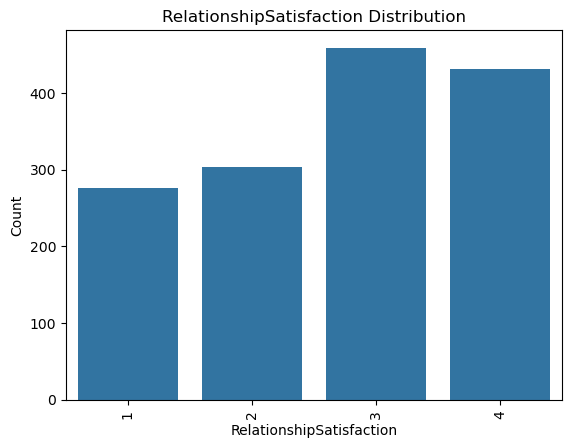

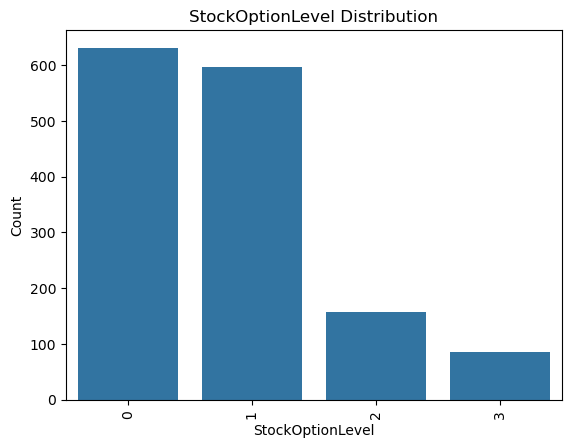

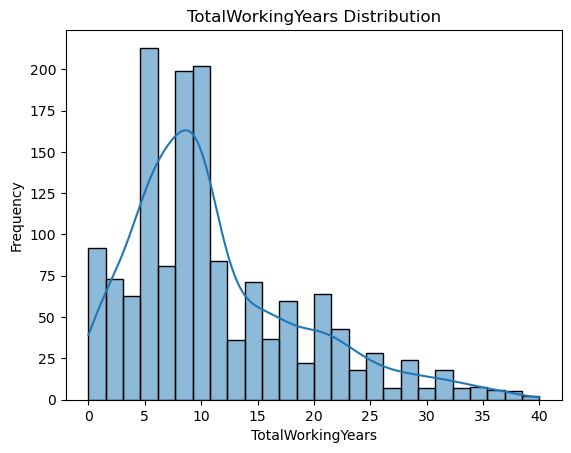

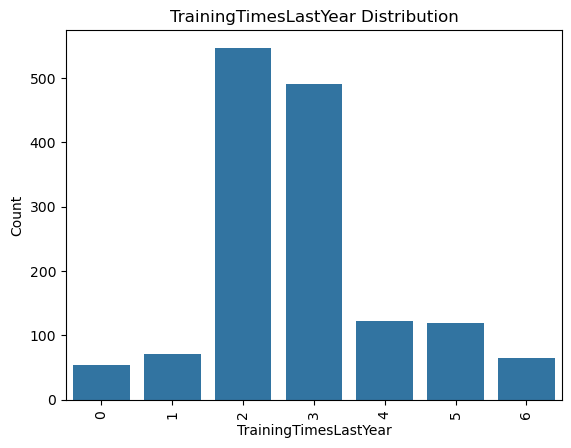

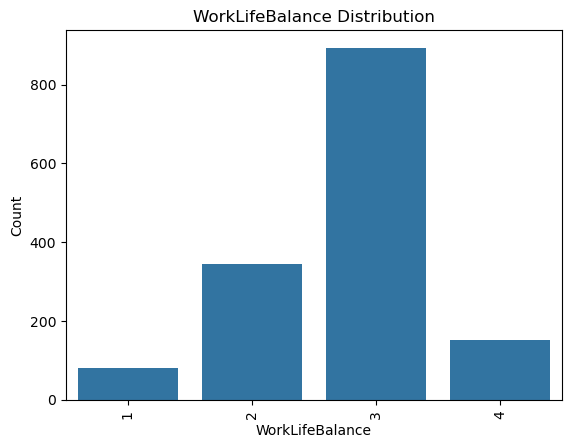

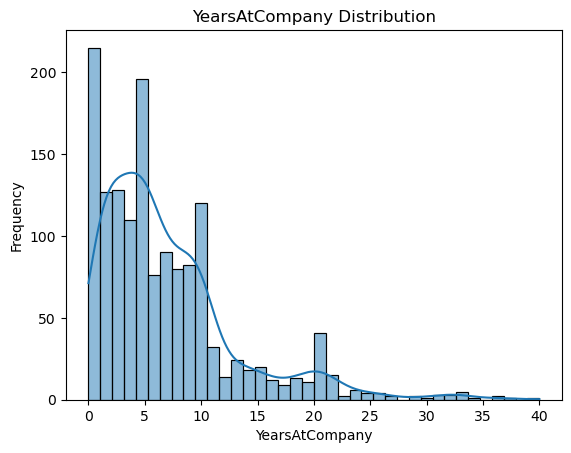

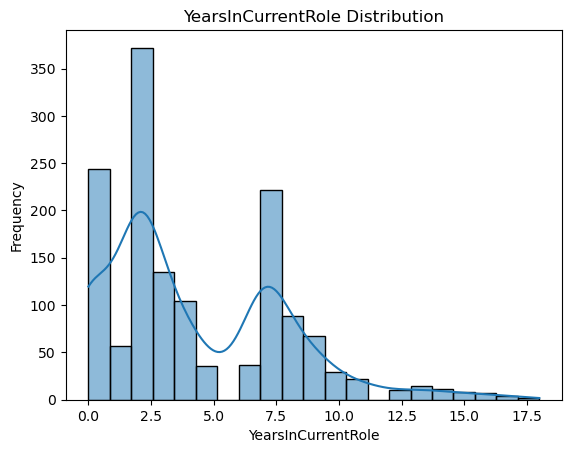

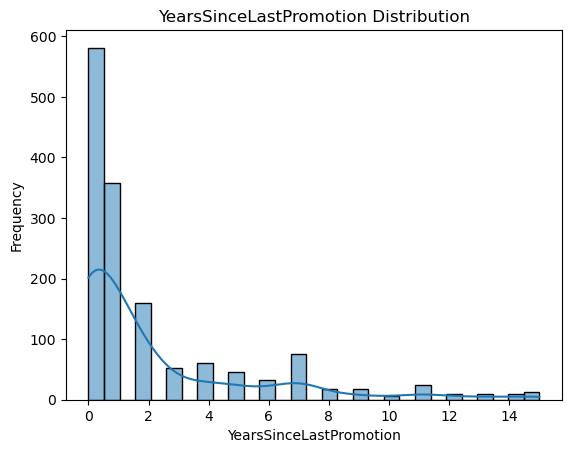

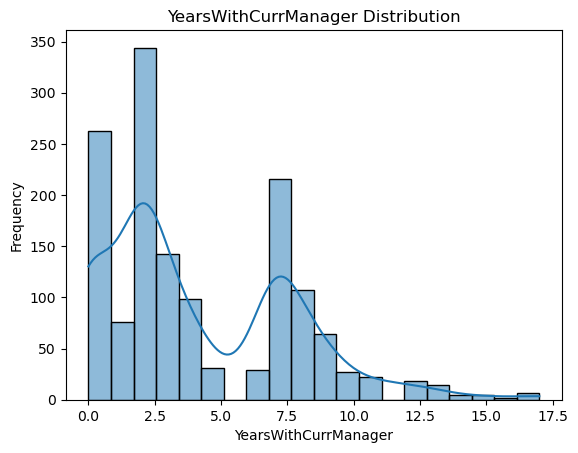

In [29]:


# List of columns for univariate analysis
columns_for_univariate = ['Age_bins', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

# loop through each column for univariate analysis
for column in columns_for_univariate:
    if clean_df[column].dtype == 'object' or clean_df[column].nunique() < 10:
        # If the column is categorical or has fewer than 10 unique values, use a bar plot
        sns.countplot(x=column, data=clean_df )
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=90)
    
    else:
        # If the column is numerical, use a histogram
        sns.histplot(clean_df[column], kde=True)
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
    plt.show()


## INSIGHTS FROM UNIVARIANAT ANALYSIS 

- The majority of workforce falls within the age range of 27 - 44 years, with the average age of an employee being 37 years. 

- Our analysis reveals that most employees rarely engage in business travel.

- Daily rates among employees are mostly evenly distributed

- The majority of our employees are situated with the Research and Development department. 

- The workforce predominantly consists of individuals with a bachelor's degree, followed closely by those with master's degree

- A significant propotion of our employees have backgrounds in Life Sciences and Medical fields. 

- The gender distribution within the workforce indicates a higher representaion of male employees.

- Most employee's level of involvement in their job is high

- Employee's job level within the company hierarchy is between 1 - 2 

- Job satisfaction levels are relatively distributed among employees

- Monthly income for employees typically falls within the range of 2500 - 10000. Most employees earn less than 10k 

- The majority of the employees do not engage in overtime work

- Most employees receive a 12-15% salary hike

- Performance ratings are predominantly at level 3

- The distribution of total working years suggests that most of our employees are at mid level positions 

- Employees report a work life balance level mostly at level 3 on a scale of 4

- Majority of employees have experienced promotion within the last 0-2 years 

## EXPLORING THE RELATIONSHIP BETWEEN TARGET VARIABLE AND DATASET

What are the factors that contribute to employee attrition in the organization?

- By analyzing these columns and their relationships with attrition rates, we can gain insights into the factors contributing to employee turnover within your organization. 

- This analysis can help identify areas for improvement and inform strategies to enhance employee retention and satisfaction.

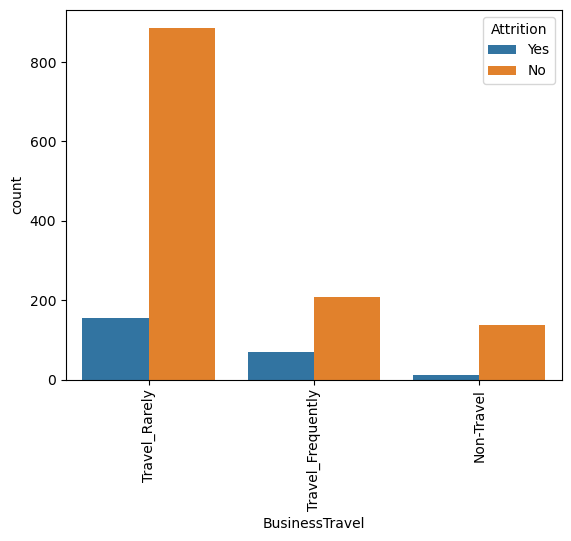

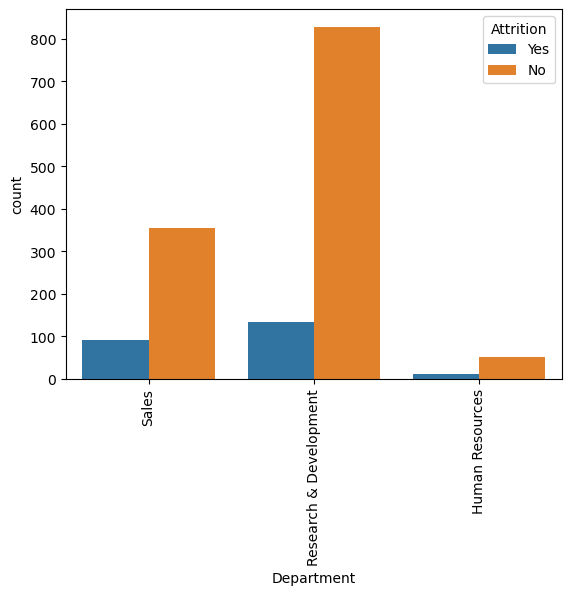

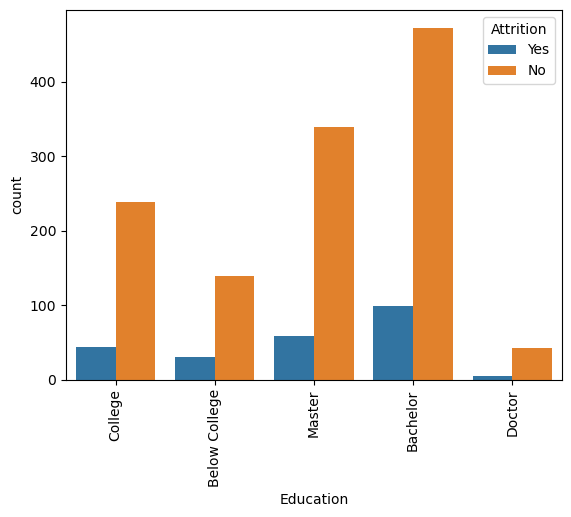

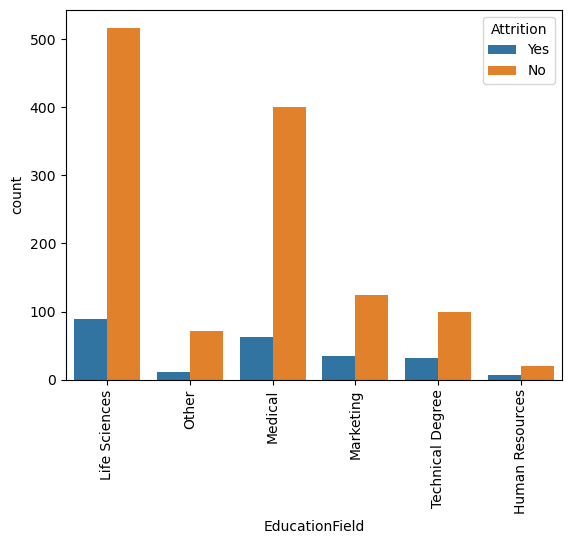

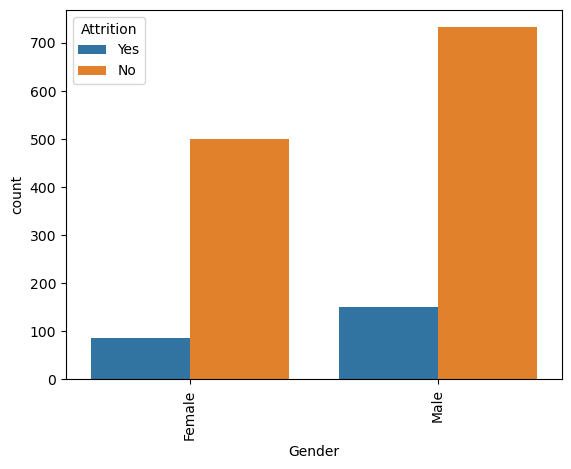

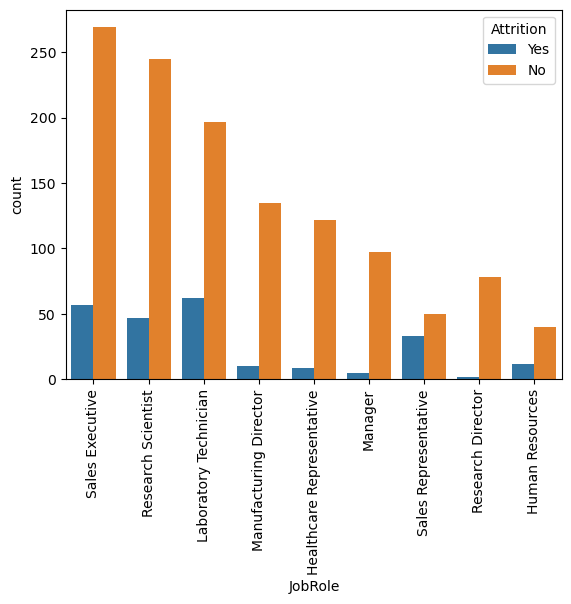

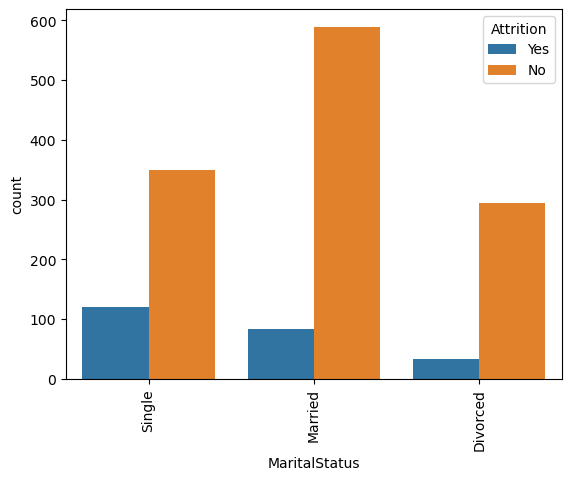

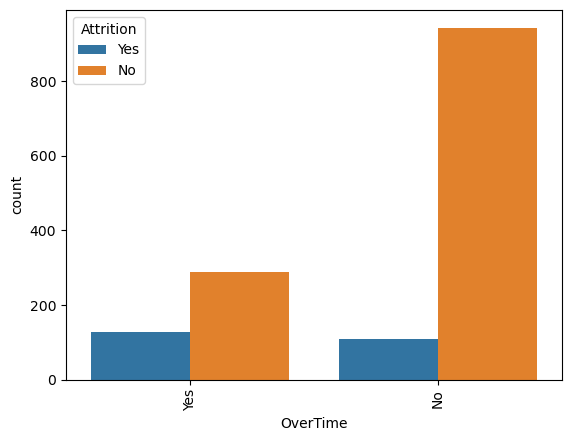

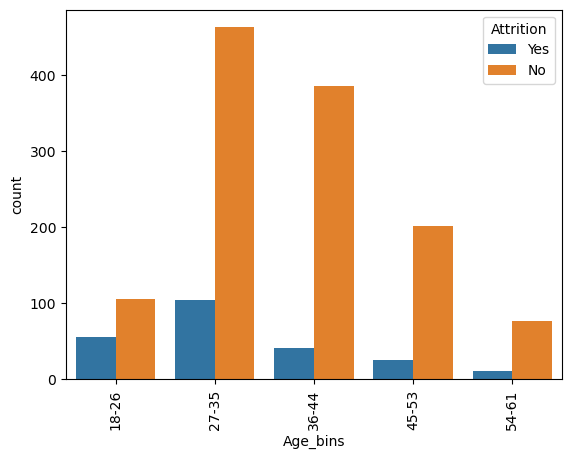

In [30]:
# ATTRITION VS CATEGORICAL 

for i, data in enumerate (clean_df[["BusinessTravel", "Department", "Education", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime",  "Age_bins"]]):
    plt.figure(i)
    sns.countplot (data = clean_df, x = data, hue = "Attrition")
    plt.xticks (rotation = 90)
    
    
    

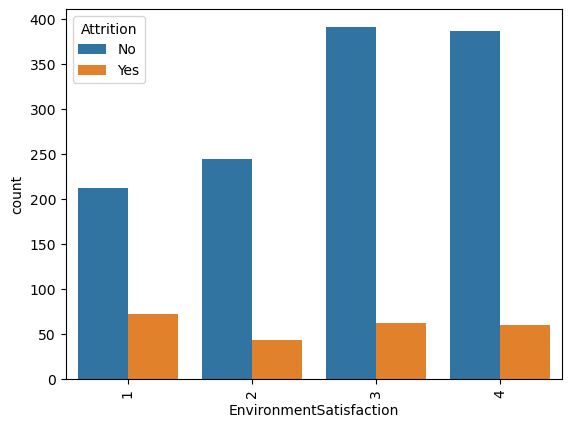

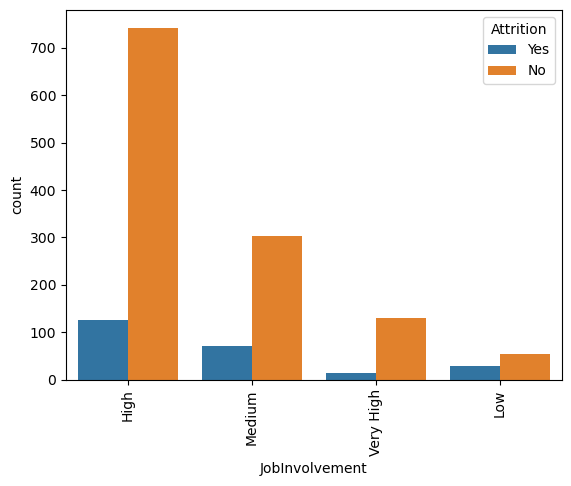

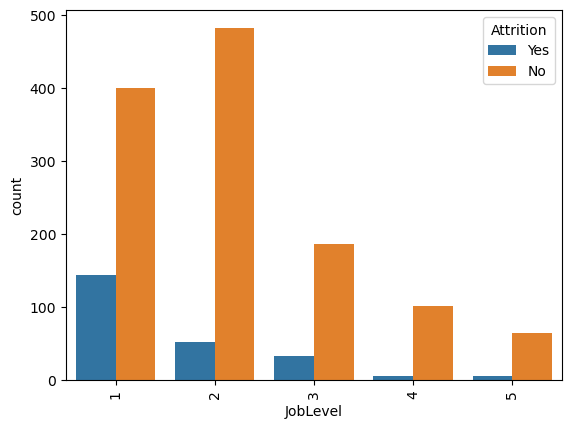

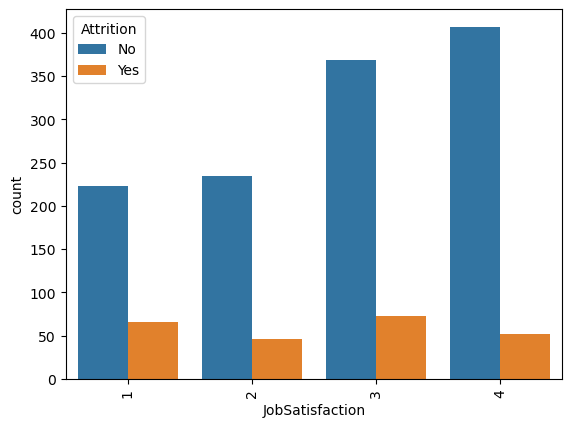

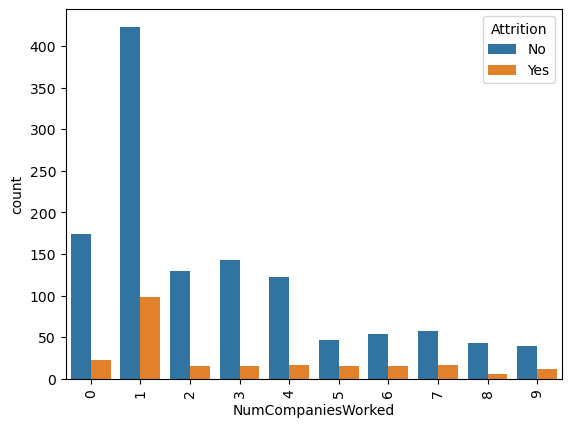

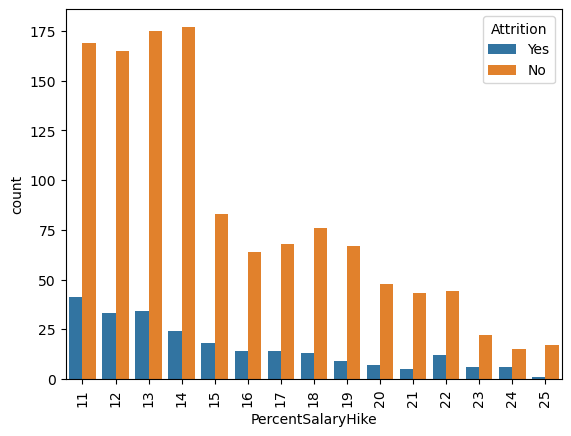

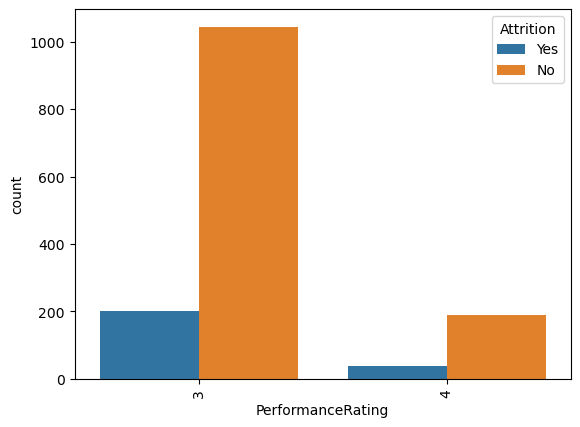

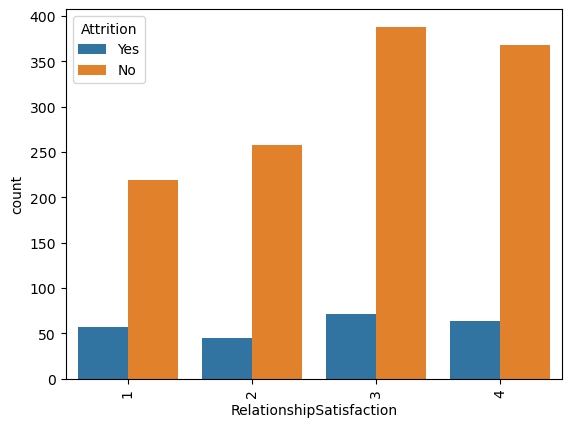

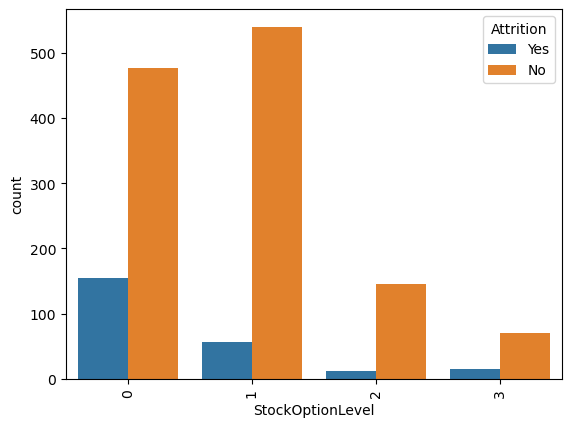

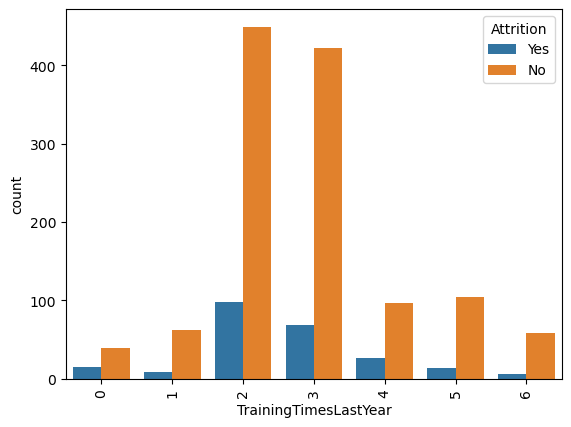

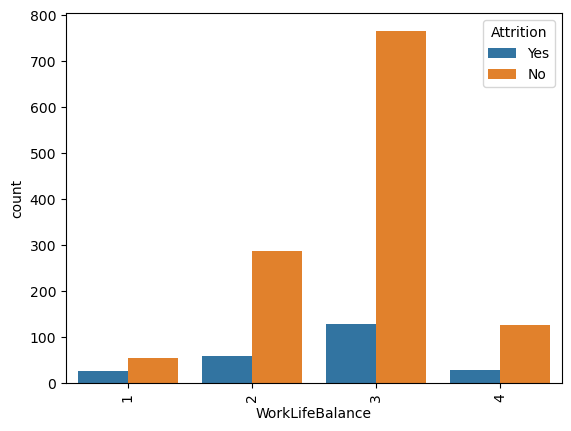

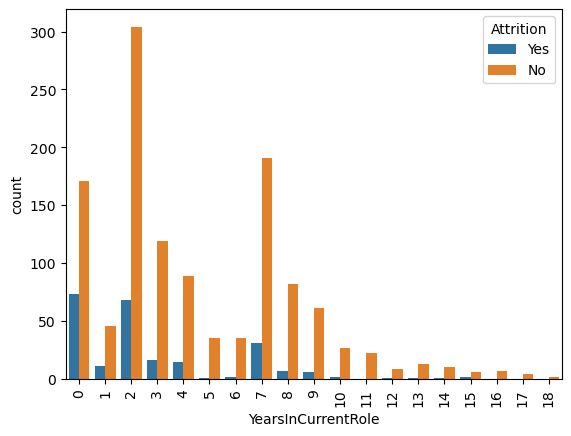

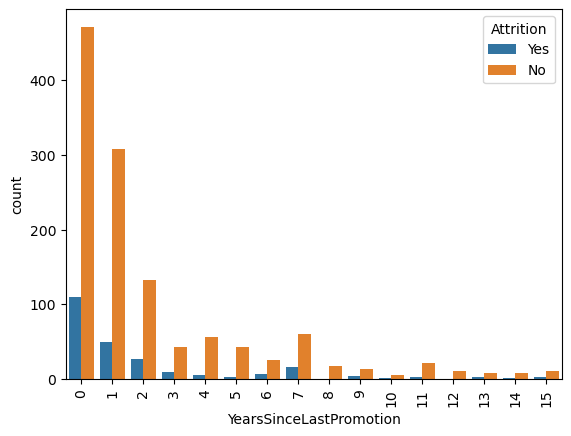

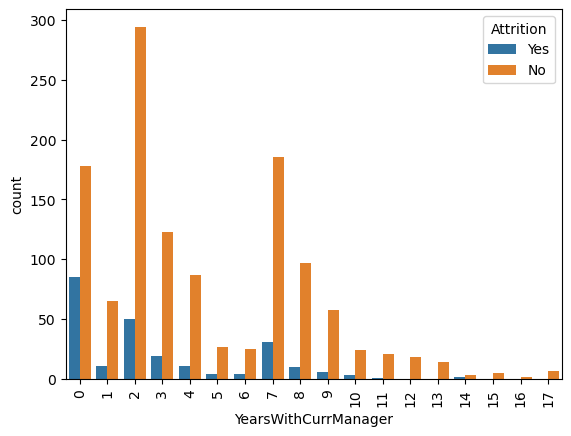

In [31]:


for i, data in enumerate (clean_df[[ "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "NumCompaniesWorked",  "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]):
    plt.figure(i)
    sns.countplot (data = clean_df, x = data, hue = "Attrition")
    plt.xticks (rotation = 90)

## INSIGHTS 


- Employees who frequently travel are at higher risk of leaving the company which could be due to burnout, work-life imbalance hereby reducing job satisfaction.

- Employees in the sales department shows a higher likelihood of leaving the company which could be stemming from high pressure of the job demand. suggesting the need for targeted retention efforts within the department

- Employees with educational background in technical degrees, marketing, life services and medical fields shows increased likelihood of attrition. 

- Employees reporting level 1 environmental satisfaction are more prone to leaving the company

- Male employees are more likely to leave the company

- Employees with low job involvement and those at job level 1 demonstrates higher attrition rates. 

- Sales representatives and executives in the sales department are likely to leave. Laboratory technicians in the research department show increased likelihood of leaving

- Lower levels of job satisfaction correlates with increased likelihood of leaving.

- Employees with a history of working in multiple companines prior to joining are more prone to leaving over time.

- Employees working overtime demonstrates higher attrition rate 

- Employees with lower level of stock option also demonstrates higher attrition rate

- Employees reporting low work life balance are at a risk of leaving, due to excessive workload or limited flexibility

- Employees with shorter tenures in their current roles and those with fewer years since their last promotion show higher likelihood of leaving

- Attrition is highest at ages 27-35 but employees in the age range 18-26, the chances of them leaving the organization is far more which could be due to generational difference.

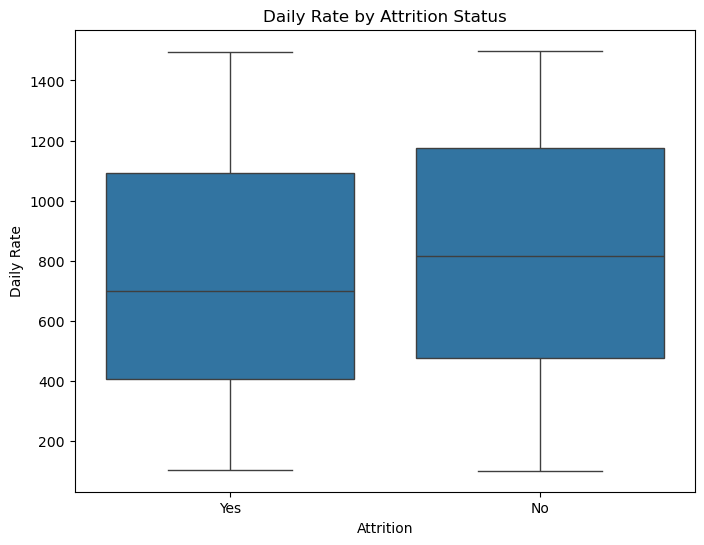

In [32]:
# ATTRITION VS DAILY RATE 

# Create box plot of daily rate by attrition status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='DailyRate')
plt.title('Daily Rate by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Daily Rate')
plt.show()


## INSIGHTS

- It suggests that there is minimal variation in daily rates between employees who have left the company and those who have not.

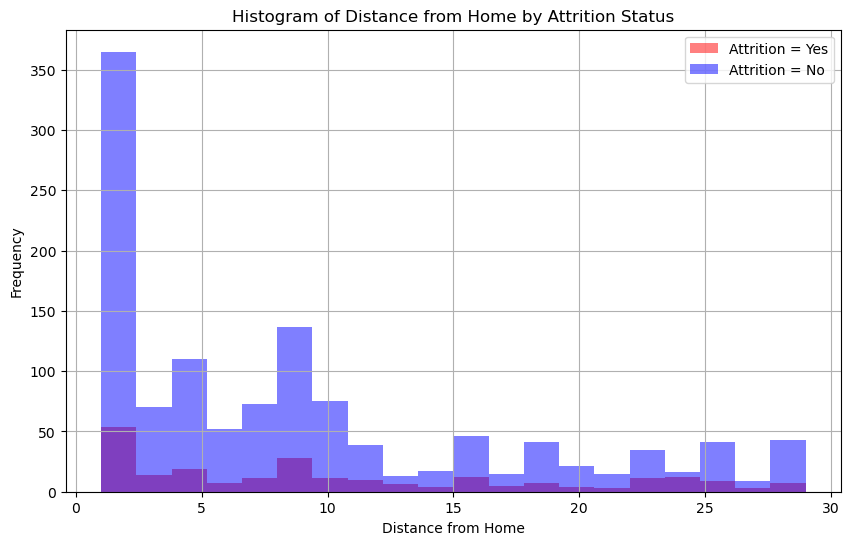

In [33]:
# DISTANCE FROM HOME 

# Filter data for employees who have left and those who have not
left_df = df[df['Attrition'] == 'Yes']
not_left_df = df[df['Attrition'] == 'No']

# Create histograms for distance from home
plt.figure(figsize=(10, 6))

plt.hist(left_df['DistanceFromHome'], bins=20, color='red', alpha=0.5, label='Attrition = Yes')
plt.hist(not_left_df['DistanceFromHome'], bins=20, color='blue', alpha=0.5, label='Attrition = No')

plt.title('Histogram of Distance from Home by Attrition Status')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## INSIGHTS

- The distance from home has minimal impact on the attrition rate, a trend that aligns with the prevalence of remote work arrangements.

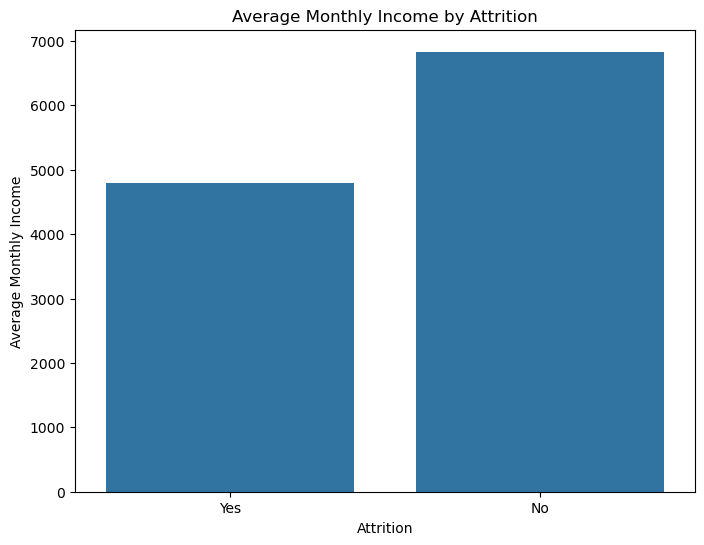

In [37]:
# MONTHLY INCOME


# Calculate the average monthly income for employees who have left and those who have not
avg_monthly_income = clean_df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()

# Create a bar plot to visualize the average monthly income for each group
plt.figure(figsize=(8, 6))
sns.barplot(x='Attrition', y='MonthlyIncome', data=df, ci=None)
plt.title('Average Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Monthly Income')
plt.show()


## INSIGHTS

The attrition rate is notably higher among employees with lower income levels, particularly those earning less than $5000, indicating a correlation between income and turnover.

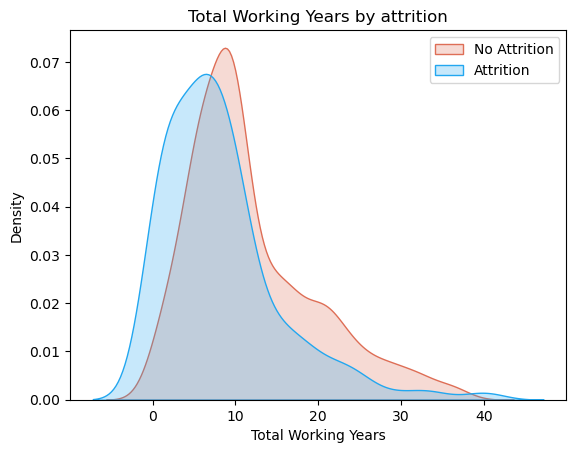

In [35]:
# TOTAL WORKING YEARS 

Twy = sns.kdeplot (clean_df.TotalWorkingYears[(clean_df["Attrition"] == "No")],
                  color = "#de6e56", fill = True)

Twy = sns.kdeplot (clean_df.TotalWorkingYears[(clean_df["Attrition"] == "Yes")],
                  color = "#22a7f0", fill = True)

Twy.legend(["No Attrition", "Attrition"], loc = "upper right")  
Twy.set_ylabel ("Density")
Twy.set_xlabel ("Total Working Years")
Twy.set_title ("Total Working Years by attrition")

plt.show()


## INSIGHTS 

- Employees with total working years ranging from 0 to 15 years exhibit a notably high attrition rate.

- The KDE plot of total working years reveals a pronounced concentration of attrition rate among employees with 0-15 years of experience, indicating a predominantly early to mid-career workforce.


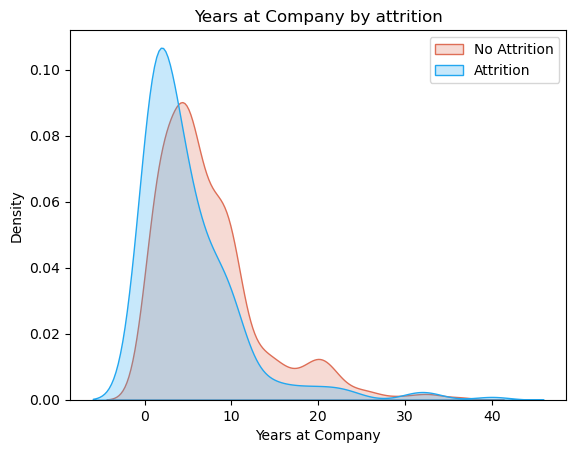

In [38]:
# YEARS AT COMPANY

Yat = sns.kdeplot (clean_df.YearsAtCompany[(clean_df["Attrition"] == "No")],
                  color = "#de6e56", fill = True)

Yat = sns.kdeplot (clean_df.YearsAtCompany[(clean_df["Attrition"] == "Yes")],
                  color = "#22a7f0", fill = True)

Yat.legend(["No Attrition", "Attrition"], loc = "upper right")  
Yat.set_ylabel ("Density")
Yat.set_xlabel ("Years at Company")
Yat.set_title ("Years at Company by attrition")

plt.show()


## INSIGHTS  

- This trend suggests that attrition is higher among employees in the early stages of their tenure, potentially indicating challenges in retaining talent during the initial years of employment. 

## OTHER BIVARIANT ANALYSIS

1. Analyze how monthly income varies across different education levels. 

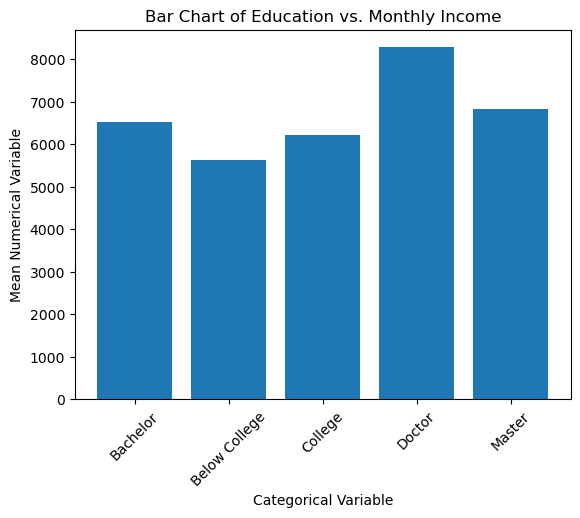

In [39]:
import matplotlib.pyplot as plt

grouped_data = clean_df.groupby("Education")["MonthlyIncome"].mean()

plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Categorical Variable")
plt.ylabel("Mean Numerical Variable")
plt.title("Bar Chart of Education vs. Monthly Income")
plt.xticks(rotation=45)  
plt.show()


## INSIGHTS 

- The bar chart analysis suggests a strong correlation between education level and monthly income.

- Higher levels of education are associated with proportionally higher monthly incomes, indicating the impact of educational attainment on earning potential.



2. Investigate whether there's a relationship between the number of years an employee has been with the company and their promotion history  to determine if tenure influences career advancement.


In [40]:
clean_df[["YearsAtCompany", "YearsSinceLastPromotion"]]

,YearsAtCompany,YearsSinceLastPromotion
0,6,0
1,10,1
2,0,0
3,8,3
4,2,2
...,...,...
1465,5,0
1466,7,1
1467,6,0
1468,9,0


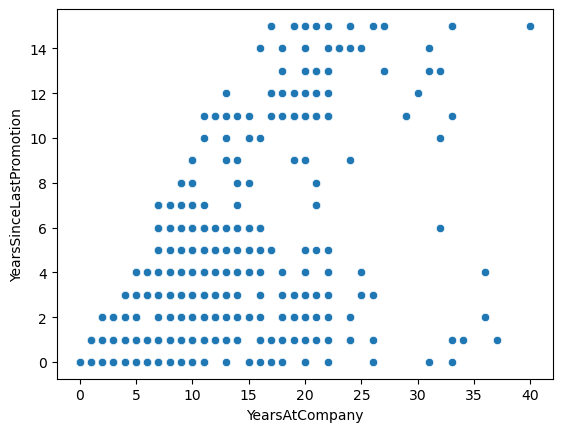

In [41]:
sns.scatterplot(x = "YearsAtCompany", y = "YearsSinceLastPromotion", data = clean_df )

plt.show()

In [42]:
clean_df["YearsAtCompany"].corr (clean_df["YearsSinceLastPromotion"])

0.6184088652176044

## INSIGHTS

- The analysis indicates a positive correlation coefficient of 0.6184 between employee tenure and promotion history, suggesting that employees who have been with the company for longer durations are more likely to have a history of promotions. 

- This implies that tenure influences career advancement within the organization, highlighting the importance of recognizing and rewarding long-serving employees for their contributions and commitment.

3. Explore the correlation between employees' satisfaction with the work environment and their perceived work-life balance  to understand if a positive work environment contributes to better work-life balance.


In [43]:
clean_df[["EnvironmentSatisfaction", "WorkLifeBalance"]]

,EnvironmentSatisfaction,WorkLifeBalance
0,2,1
1,3,3
2,4,3
3,4,3
4,1,3
...,...,...
1465,3,3
1466,4,3
1467,2,3
1468,4,2


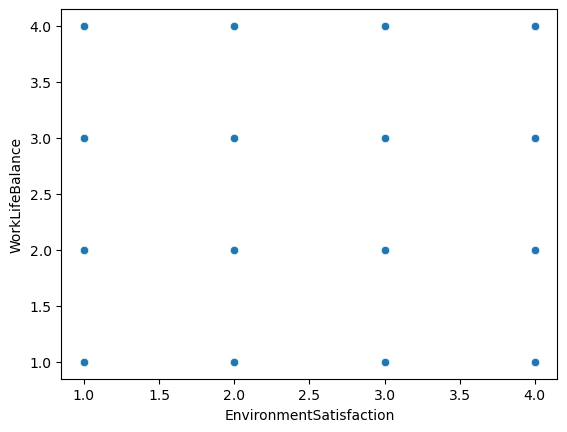

In [44]:
sns.scatterplot(x = "EnvironmentSatisfaction", y = "WorkLifeBalance", data = clean_df )

plt.show()

In [45]:
clean_df["EnvironmentSatisfaction"].corr(clean_df["WorkLifeBalance"])

0.027627295460115553

# INSIGHTS 

- The correlation coefficient of 0.0276 suggests a slight positive relationship between employees' satisfaction with the work environment and their perceived work-life balance. 

- However, the correlation is weak, indicating that while a positive work environment may contribute to better work-life balance, other factors likely play a more significant role.

4. Analyze how the frequency of overtime work varies across different job roles to identify roles that may have higher demands for overtime work.


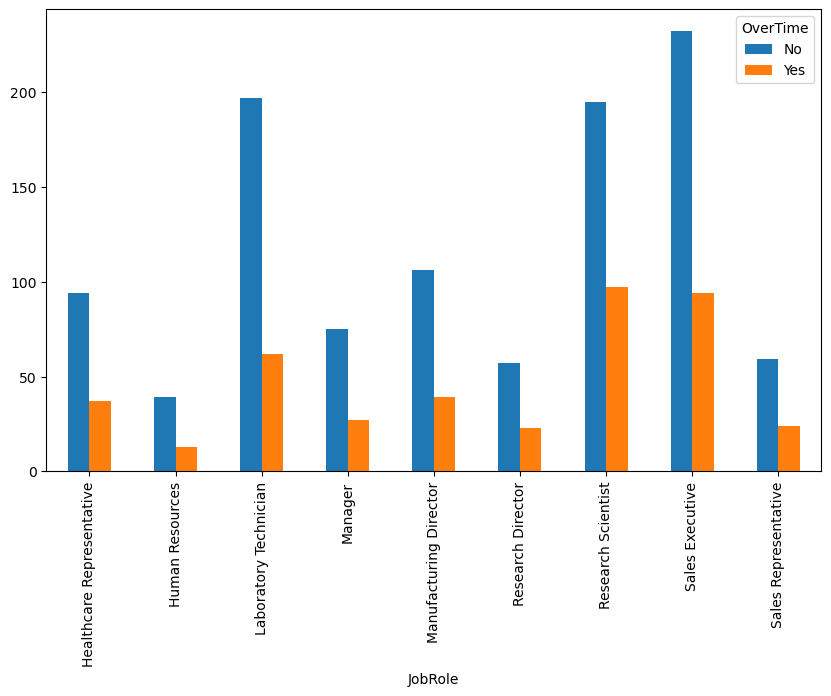

In [46]:
cross_tab = pd.crosstab(clean_df['JobRole'], clean_df['OverTime'])

cross_tab.plot(kind='bar', figsize=(10, 6))

plt.show ()

# INSIGHTS 

- Research scientists, Sales Executives and Sales Representatives are the highest employees who work over time. 

- They have higher demands for overtime work.


5. Job Involvement vs Years in Current Role

In [47]:
clean_df[["JobInvolvement", "YearsInCurrentRole"]]

,JobInvolvement,YearsInCurrentRole
0,High,4
1,Medium,7
2,Medium,0
3,High,7
4,High,2
...,...,...
1465,Very High,2
1466,Medium,7
1467,Very High,2
1468,Medium,6


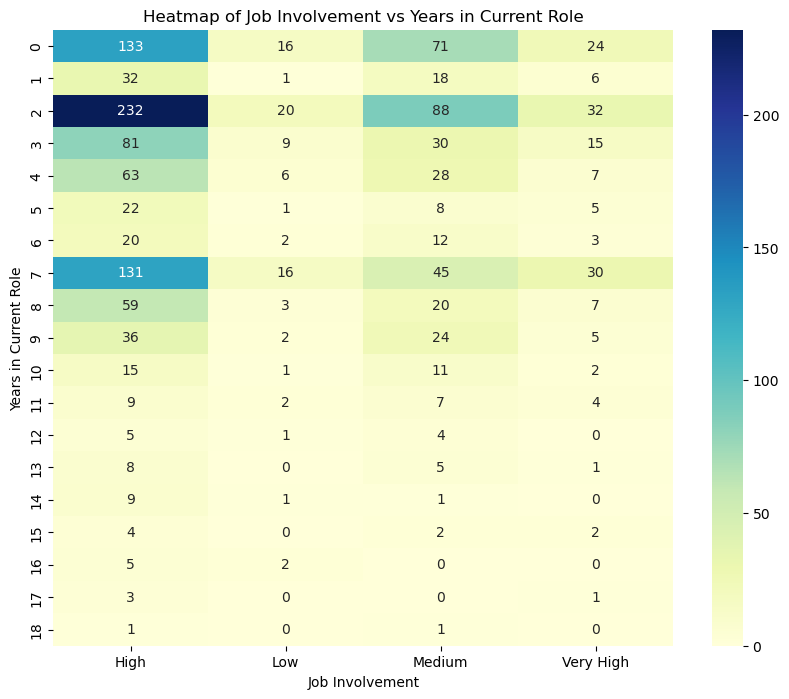

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count the frequency of occurrences
pivot_table = clean_df.pivot_table(index='YearsInCurrentRole', columns='JobInvolvement', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Job Involvement')
plt.ylabel('Years in Current Role')
plt.title('Heatmap of Job Involvement vs Years in Current Role')

plt.show()


6. Does participating in training affects the performance rate 

In [49]:
clean_df[["TrainingTimesLastYear", "PerformanceRating"]]

,TrainingTimesLastYear,PerformanceRating
0,0,3
1,3,4
2,3,3
3,3,3
4,3,3
...,...,...
1465,3,3
1466,5,3
1467,0,4
1468,3,3


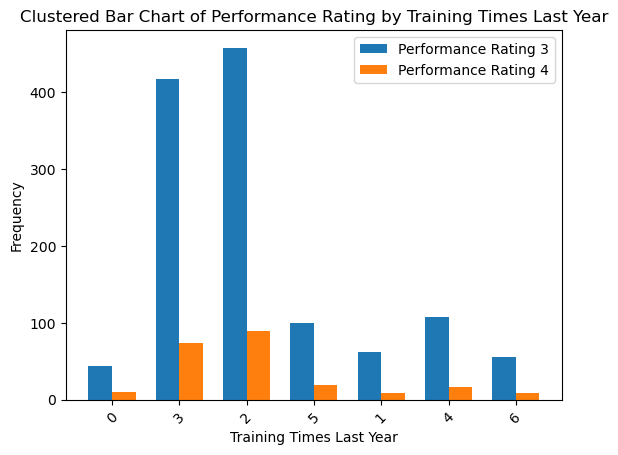

In [50]:
# Get unique categories of TrainingTimesLastYear and PerformanceRating
training_times_categories = clean_df['TrainingTimesLastYear'].unique()
performance_rating_categories = clean_df['PerformanceRating'].unique()

# Count occurrences of each combination of categories
counts = np.zeros((len(performance_rating_categories), len(training_times_categories)))
for i, rating in enumerate(performance_rating_categories):
    for j, training_times in enumerate(training_times_categories):
        counts[i, j] = clean_df[(clean_df['PerformanceRating'] == rating) & (clean_df['TrainingTimesLastYear'] == training_times)].shape[0]

# Plot the clustered bar chart
x = np.arange(len(training_times_categories))
width = 0.35 

fig, ax = plt.subplots()
for i, rating in enumerate(performance_rating_categories):
    ax.bar(x + width * i, counts[i, :], width, label=f'Performance Rating {rating}')

ax.set_xlabel('Training Times Last Year')
ax.set_ylabel('Frequency')
ax.set_title('Clustered Bar Chart of Performance Rating by Training Times Last Year')
ax.set_xticks(x + width * (len(performance_rating_categories) - 1) / 2)
ax.set_xticklabels(training_times_categories)
ax.legend()

plt.xticks(rotation=45)  
plt.show()


7. How does job satisfaction correlate with other factors such as performance ratings or work-life balance?


In [51]:
clean_df[["JobSatisfaction", "WorkLifeBalance"]]

,JobSatisfaction,WorkLifeBalance
0,4,1
1,2,3
2,3,3
3,3,3
4,2,3
...,...,...
1465,4,3
1466,1,3
1467,2,3
1468,2,2


<Axes: xlabel='JobSatisfaction', ylabel='WorkLifeBalance'>

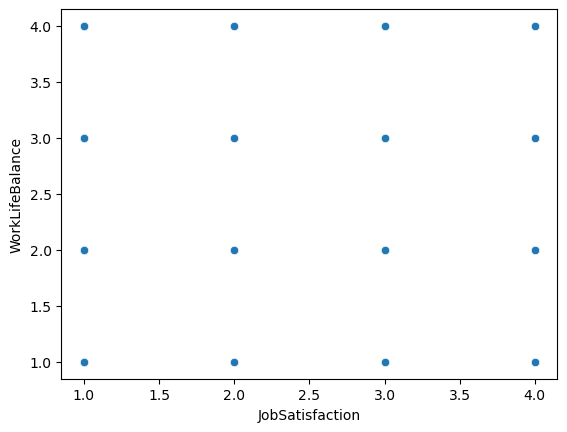

In [52]:
sns.scatterplot(x = "JobSatisfaction", y = "WorkLifeBalance", data = clean_df)

In [53]:
clean_df["JobSatisfaction"].corr (clean_df["WorkLifeBalance"])

-0.01945871021297395

In [54]:
clean_df["JobSatisfaction"].corr (clean_df["PerformanceRating"])

0.002297197063780151

## INSIGHTS

- The correlation analysis between job satisfaction and work-life balance yields a weak negative correlation coefficient of approximately -0.0195. 

- The correlation is close to zero, indicating that the relationship is very weak and may not have practical significance. 

## BUILDING THE MODEL

In [55]:
#making a copy of dataset 

pred_df = clean_df.copy()

pred_df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bins
0,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,36-44
1,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,45-53
2,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,36-44
3,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,27-35
4,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,27-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,884,Research & Development,23,College,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,36-44
1466,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,36-44
1467,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,27-35
1468,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,45-53


In [56]:
# checking for missing values 

pred_df.isnull().sum()

Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Age_bins                    0
dtype: int64

There are no missing values in the dataset

## ENCODING CATEGORICAL VARIABLES 

In [57]:

# to get the categorical columns 
object_columns_names = pred_df.select_dtypes(include=["object"]).columns.tolist()

# Print the names of the selected object columns
print(object_columns_names)


['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole', 'MaritalStatus', 'OverTime']


In [58]:
# catgorical variables 

pred_df[['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole', 'MaritalStatus', 'OverTime', 'Age_bins']]

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobRole,MaritalStatus,OverTime,Age_bins
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Female,High,Sales Executive,Single,Yes,36-44
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,Male,Medium,Research Scientist,Married,No,45-53
2,Yes,Travel_Rarely,Research & Development,College,Other,Male,Medium,Laboratory Technician,Single,Yes,36-44
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Female,High,Research Scientist,Married,Yes,27-35
4,No,Travel_Rarely,Research & Development,Below College,Medical,Male,High,Laboratory Technician,Married,No,27-35
...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,College,Medical,Male,Very High,Laboratory Technician,Married,No,36-44
1466,No,Travel_Rarely,Research & Development,Below College,Medical,Male,Medium,Healthcare Representative,Married,No,36-44
1467,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Male,Very High,Manufacturing Director,Married,Yes,27-35
1468,No,Travel_Frequently,Sales,Bachelor,Medical,Male,Medium,Sales Executive,Married,No,45-53




- One Hot Encoding is used when categorical variables has no inherent order or hierarchy.

- Label Encoding is used where caregorical variables has ordinal categories whcih can be ranked. 

## LABEL ENCODING 

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()

le

LabelEncoder()

In [60]:
pred_df["Education_label"] = le.fit_transform (pred_df["Education"])
pred_df["JobInvolvement_label"] = le.fit_transform (pred_df["JobInvolvement"])
pred_df["Age_label"] = le.fit_transform (pred_df["Age_bins"])



## ONE HOT ENCODING 

In [61]:
# creating a dummy variable of categorical variables 

dummy = pd.get_dummies (pred_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime' ]], dtype = int)

dummy

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [62]:
merged_df = pd.concat ([pred_df, dummy], axis = "columns")

merged_df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,94,...,0,0,0,1,0,0,0,1,0,1
1,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,Male,61,...,0,0,1,0,0,0,1,0,1,0
2,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,92,...,0,0,0,0,0,0,0,1,0,1
3,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Female,56,...,0,0,1,0,0,0,1,0,0,1
4,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,Male,40,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,884,Research & Development,23,College,Medical,3,Male,41,...,0,0,0,0,0,0,1,0,1,0
1466,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,4,Male,42,...,0,0,0,0,0,0,1,0,1,0
1467,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2,Male,87,...,1,0,0,0,0,0,1,0,0,1
1468,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,4,Male,63,...,0,0,0,1,0,0,1,0,1,0


In [63]:
# defining the X variable 

X = merged_df.drop (['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole', 'MaritalStatus', 'OverTime', 'Age_bins',
                     'BusinessTravel_Travel_Rarely', 'Department_Sales', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Sales Representative', 
                     'MaritalStatus_Single', 'OverTime_Yes'], axis = 1)

X

,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_No
0,1102,1,2,94,2,4,5993,19479,8,11,...,0,0,0,0,0,0,1,0,0,0
1,279,8,3,61,2,2,5130,24907,1,23,...,0,0,0,0,0,1,0,0,1,1
2,1373,2,4,92,1,3,2090,2396,6,15,...,0,1,0,0,0,0,0,0,0,0
3,1392,3,4,56,1,3,2909,23159,1,11,...,0,0,0,0,0,1,0,0,1,0
4,591,2,1,40,1,2,3468,16632,9,12,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,3,41,2,4,2571,12290,4,17,...,0,1,0,0,0,0,0,0,1,1
1466,613,6,4,42,3,1,9991,21457,4,15,...,0,0,0,0,0,0,0,0,1,1
1467,155,4,2,87,2,2,6142,5174,1,20,...,0,0,0,1,0,0,0,0,1,0
1468,1023,2,4,63,2,2,5390,13243,2,14,...,0,0,0,0,0,0,1,0,1,1


In [64]:
# convert to an integer

new_value = {"Yes" : 1, "No" : 0}

clean_df["Attrition"] = clean_df["Attrition"].replace(new_value)



In [65]:
y = clean_df["Attrition"]

y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## PLOTTING A CORRELATION GRAPH OF ALL PREDICTORS WITH ATTRITION


In [66]:
nw = pd.concat ([X, y], axis = "columns")

nw

,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_No,Attrition
0,1102,1,2,94,2,4,5993,19479,8,11,...,0,0,0,0,0,1,0,0,0,1
1,279,8,3,61,2,2,5130,24907,1,23,...,0,0,0,0,1,0,0,1,1,0
2,1373,2,4,92,1,3,2090,2396,6,15,...,1,0,0,0,0,0,0,0,0,1
3,1392,3,4,56,1,3,2909,23159,1,11,...,0,0,0,0,1,0,0,1,0,0
4,591,2,1,40,1,2,3468,16632,9,12,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,3,41,2,4,2571,12290,4,17,...,1,0,0,0,0,0,0,1,1,0
1466,613,6,4,42,3,1,9991,21457,4,15,...,0,0,0,0,0,0,0,1,1,0
1467,155,4,2,87,2,2,6142,5174,1,20,...,0,0,1,0,0,0,0,1,0,0
1468,1023,2,4,63,2,2,5390,13243,2,14,...,0,0,0,0,0,1,0,1,1,0


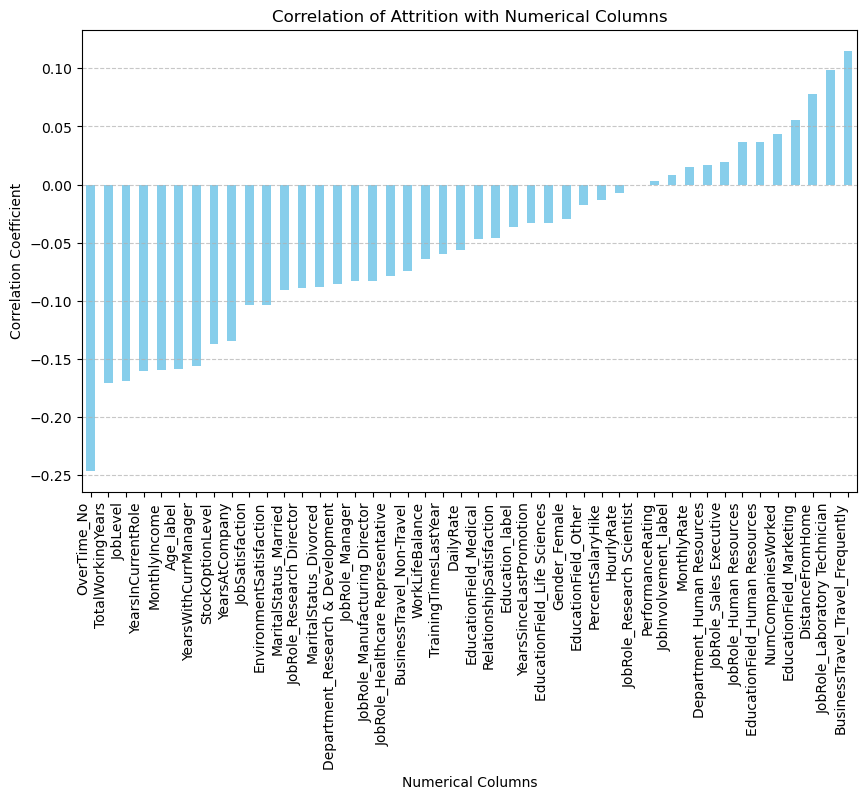

In [67]:

# Calculate correlation of 'Attrition' with numerical columns
attrition_correlation = nw.corr()['Attrition'].drop('Attrition')

# Plot correlation of 'Attrition' with numerical columns
plt.figure(figsize=(10, 6))
attrition_correlation.sort_values().plot(kind='bar', color='skyblue')
plt.title("Correlation of Attrition with Numerical Columns")
plt.xlabel("Numerical Columns")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## SPLITTING THE DATA

In [72]:
# import the required libraries

from sklearn.model_selection import train_test_split, GridSearchCV



In [73]:


# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)


In [74]:
X_train.shape

(1176, 44)

In [75]:
X_test.shape

(294, 44)

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression ()

In [77]:
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_predicted = model.predict (X_test)


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


In [80]:
prediction = model.predict (X_test)

cmf_matrix = confusion_matrix (y_test, prediction)

print ("Accuracy score: ", accuracy_score (y_test, prediction))

Accuracy score:  0.8469387755102041


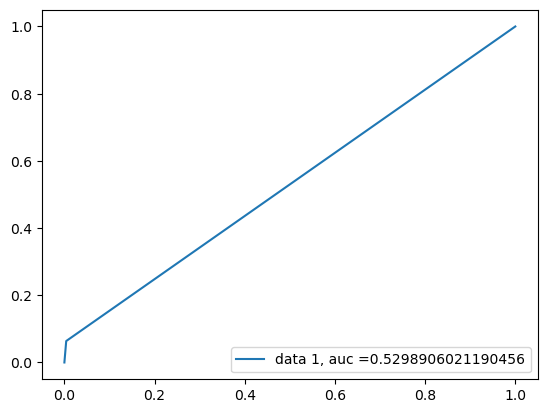

In [83]:
# plotting ROC curve

ax2 = fig.add_subplot (1,2,2)
y_pred = model.predict_proba (X_test)[::, 1]
fpr, tpr, _ = roc_curve (y_test, prediction)
auc = roc_auc_score (y_test, prediction)

ax2 = plt.plot(fpr, tpr, label = "data 1, auc =" + str (auc))
plt.legend (loc = 4)

plt.show ()

In [84]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predicted))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.75      0.06      0.12        47

    accuracy                           0.85       294
   macro avg       0.80      0.53      0.52       294
weighted avg       0.83      0.85      0.79       294



## INSIGHTS 

- The model performs well in predicting employees who are likely to stay (class 0), as evidenced by high precision and recall scores.

- However, the model is failing in predicting employees who are likely to leave (class 1), with low recall, and F1-score.

## Addressing class imbalance

- We would make use of oversampling, particularly using SMOTE

In [85]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = "minority")

X_sm, y_sm = smote.fit_resample (X, y)

y_sm.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20, random_state = 15, stratify = y_sm)



In [95]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression ()

In [96]:
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_predicted = model.predict (X_test)



In [98]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predicted))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       247
           1       0.67      0.70      0.69       247

    accuracy                           0.68       494
   macro avg       0.68      0.68      0.68       494
weighted avg       0.68      0.68      0.68       494



- Overall, the results suggest that the model's performance has improved after addressing class imbalance using SMOTE, with similar precision, recall, and F1-score for both classes. 

- However, further evaluation and fine-tuning may be necessary to enhance the model's predictive capabilities further.

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X, y, cv=cv)

array([0.83333333, 0.79931973, 0.8707483 , 0.84353741, 0.84693878])

In [101]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [107]:
# Define the models and their hyperparameters
def find_best_model (X, y):
    algorithm = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
            'max_depth': [3, 5, 10]
        }
    }
}

# Train and evaluate each model using GridSearchCV
    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for model_name, config in algorithm.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'classification_report': report
        })

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'classification_report'])


In [109]:
best_model = find_best_model (X_train, y_train)

best_model

,model,best_score,best_params,classification_report
0,Logistic Regression,0.842532,{'C': 10},"{'0': {'precision': 0.8226415094339623, 'recal..."
1,Random Forest,0.915949,"{'max_depth': 20, 'n_estimators': 200}","{'0': {'precision': 0.9011406844106464, 'recal..."
2,Gradient Boosting,0.917468,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...","{'0': {'precision': 0.9122137404580153, 'recal..."


In [113]:
best_model["classification_report"][0]

{'0': {'precision': 0.9122137404580153,
  'recall': 0.9676113360323887,
  'f1-score': 0.9390962671905697,
  'support': 247.0},
 '1': {'precision': 0.9655172413793104,
  'recall': 0.9068825910931174,
  'f1-score': 0.9352818371607515,
  'support': 247.0},
 'accuracy': 0.937246963562753,
 'macro avg': {'precision': 0.9388654909186629,
  'recall': 0.937246963562753,
  'f1-score': 0.9371890521756606,
  'support': 494.0},
 'weighted avg': {'precision': 0.9388654909186628,
  'recall': 0.937246963562753,
  'f1-score': 0.9371890521756606,
  'support': 494.0}}

In [114]:
best_model["classification_report"][1]

{'0': {'precision': 0.9011406844106464,
  'recall': 0.9595141700404858,
  'f1-score': 0.9294117647058824,
  'support': 247.0},
 '1': {'precision': 0.9567099567099567,
  'recall': 0.8947368421052632,
  'f1-score': 0.9246861924686193,
  'support': 247.0},
 'accuracy': 0.9271255060728745,
 'macro avg': {'precision': 0.9289253205603016,
  'recall': 0.9271255060728745,
  'f1-score': 0.9270489785872509,
  'support': 494.0},
 'weighted avg': {'precision': 0.9289253205603016,
  'recall': 0.9271255060728745,
  'f1-score': 0.9270489785872508,
  'support': 494.0}}

In [115]:
best_model["classification_report"][2]

{'0': {'precision': 0.9122137404580153,
  'recall': 0.9676113360323887,
  'f1-score': 0.9390962671905697,
  'support': 247.0},
 '1': {'precision': 0.9655172413793104,
  'recall': 0.9068825910931174,
  'f1-score': 0.9352818371607515,
  'support': 247.0},
 'accuracy': 0.937246963562753,
 'macro avg': {'precision': 0.9388654909186629,
  'recall': 0.937246963562753,
  'f1-score': 0.9371890521756606,
  'support': 494.0},
 'weighted avg': {'precision': 0.9388654909186628,
  'recall': 0.937246963562753,
  'f1-score': 0.9371890521756606,
  'support': 494.0}}

Based on our results, we could see Gradient Boost is our best model to use 